# Visualising Dialectical Structures

`tau.util` offers some basic helper functions to export dialectical structures as tex or dot file. These can then be used to further transform them into other formats as is shown here.

In [1]:
# imports
from tau.util import create_random_arguments, write_as_tex, write_as_dot
from IPython.display import SVG
from subprocess import call, run
from os import environ, getcwd, chdir, remove, path
import sys
# some helper functions
def execute_command(command, program_name):
    #print(command)
    try:
        retcode = call(command, shell=True)
        if retcode != 0:
            print(program_name + " terminated with signal", retcode, file=sys.stderr)
    except OSError as e:
        print(program_name + " execution failed:", e, file=sys.stderr)



## Using the dot format to create automatically layouted graphs

By using the dot-format we can use dot-based programs to render the dot-file in other file-formats (e.g. svg, pdf or what have you). The following function creates an svg-file by using other programs (the function relies on the programs [dot2tex](https://dot2tex.readthedocs.io/en/latest/), [pdflatex](https://ctan.org/pkg/pdftex) and [pdf2svg](https://github.com/dawbarton/pdf2svg) and their dependencies - see e.g. [here](https://dot2tex.readthedocs.io/en/latest/installation_guide.html#dependencies)).

In [2]:
def dot2svg(dot_file_name, directory = None, keep_temporary_files = False, dot2tex_template = 'dot2tex_sw-template.tex'):
    """ Creating an svg file from the given dot file.
    
    This function will create a svg file of the arguments. It will additionally create a temporary tex and a pdf file
    which will be deleted if :code:`keep_temporary_files` is set to :code:`false`. The function relies one the programs 
    `dot2tex`, `pdflatex` and `pdf2svg` to be installed. (The might be more specific latex dependencies - e.g. tikz - which
    can be find in the used :code:`dot2tex_template`.)

    """
    if directory is None:
        directory = getcwd()
    
    current_dir = getcwd()
    # changing working directory that files generated are being put there
    chdir(directory)
    file_name = dot_file_name.split('.')[0]
    
    # dot2tex
    command = "dot2tex -ftikz --crop --margin 5pt  -tmath --autosize --template "+ dot2tex_template + " " + dot_file_name + " -o " + file_name + ".tex"
    execute_command(command, "dot2tex")

    # tex2pdf
    command = "pdflatex --shell-escape " + file_name + ".tex" + " -o " + file_name + ".pdf"
    execute_command(command, "pdflatex")

    # pdf2svg
    command = "pdf2svg " + file_name + ".pdf" + " " + file_name + ".svg"
    execute_command(command, "pdf2svg")
    
    # ToDo: remove other temp file (aux, log?)
    if keep_temporary_files is False:
        if path.exists(file_name + ".pdf"):
            remove(file_name + ".pdf")
        if path.exists(file_name + ".tex"):
            remove(file_name + ".tex")
    
    chdir(current_dir)
    return path.join(directory,file_name + '.svg')

In [3]:
args = create_random_arguments(5, 3, 3, variation=True, connected=True)

file_name = "nice-graph.dot"

write_as_dot(getcwd(), file_name, args)
# if we set  keep_temporary_files generated pdf and tex files will be kept.
svg_file_name = dot2svg(dot_file_name = file_name, directory = getcwd(), keep_temporary_files = True)

Instead of just exporting the graph into an svg file you can show the graph right here by using [IPython's Rich Display System](https://nbviewer.ipython.org/github/ipython/ipython/blob/2.x/examples/Notebook/Display%20System.ipynb).

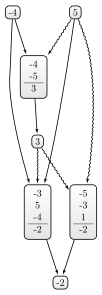

In [4]:
def show_arguments(args, file_name_without_suffix = "img_tmp", directory = getcwd()):
    dot_file_name = file_name_without_suffix + ".dot"
    
    write_as_dot(directory, dot_file_name, args)
    svg_file_name = dot2svg(dot_file_name, directory)
    return SVG(filename = svg_file_name)

args = create_random_arguments(5, 3, 3, variation=True, connected=True)
show_arguments(args, directory = getcwd())